In [97]:
# Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (mean_absolute_percentage_error as MAPE, mean_squared_error as MSE)

In [115]:
df = pd.read_csv("Data/CO2 Emissions_Canada.csv")
df1 = df.dropna()

In [117]:
df1.shape

(7385, 12)

C:\Users\Kan\AppData\Local\Temp\ipykernel_5128\2875483396.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df1.corr()


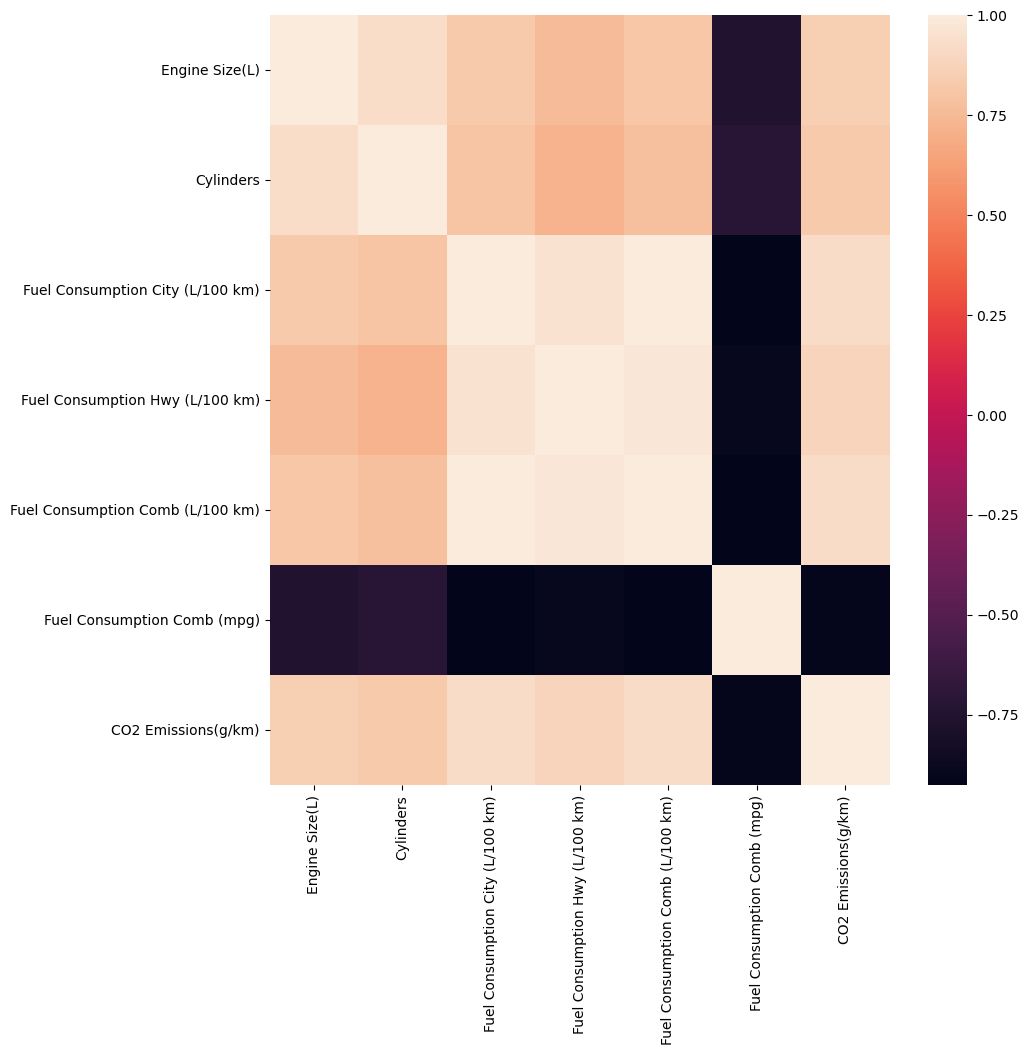

In [79]:
corrmat = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

In [80]:
test_size = 0.2
#df1 = df1.drop(columns={"Make", "Model", "Vehicle Class", "Transmission", "Fuel Type"})
df1 = df1.drop(columns={"Make", "Model", "Vehicle Class", "Transmission", "Fuel Type", "Fuel Consumption Comb (mpg)"})
data_x = df1.drop(columns={"CO2 Emissions(g/km)"})
data_y = df1["CO2 Emissions(g/km)"]

In [81]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=test_size, random_state=42)

# Linear Reg

In [99]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [100]:
y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

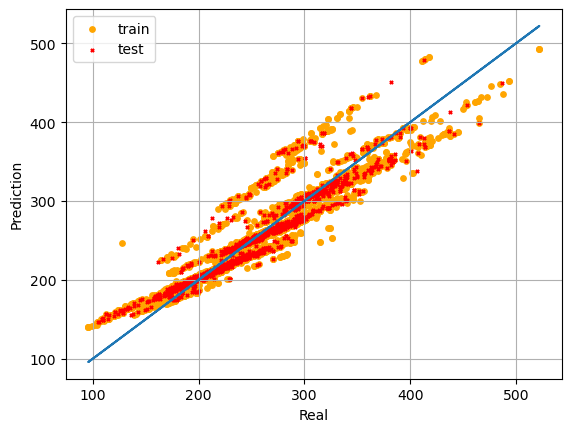

In [101]:
plt.scatter(y_train, y_pred_train , color="orange", marker = "o", s = 15, label="train")
plt.scatter(y_test, y_pred_test ,   color="red", marker = "x", s = 5, label="test")
plt.plot(data_y, data_y, "-")
# putting labels
plt.xlabel('Real')
plt.ylabel('Prediction')
# function to show plot
plt.grid()
plt.legend()
plt.show()

In [102]:


y_pred_test = reg.predict(x_test)            # Predict
Error = MAPE(y_test, y_pred_test)          # Check Performance
Error*100

5.590187136395988

In [103]:
MSE(y_test, y_pred_test)          # Check Performance

421.8639022158905

In [104]:
df2 = df1.copy()
df2["Predict"] = reg.predict(data_x)
df2.to_csv("CO2_prediction.csv")

# Ridge Reg

In [105]:
from sklearn import linear_model 
ridge = linear_model.Lasso()
ridge.fit(x_train, y_train)

Lasso()

In [106]:
y_pred_train = ridge.predict(x_train)
y_pred_test = ridge.predict(x_test)

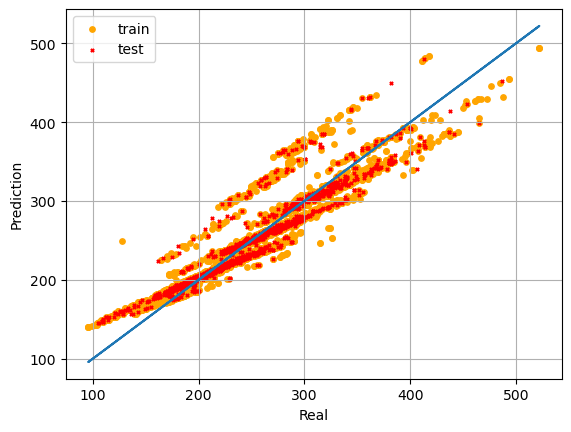

In [107]:
plt.scatter(y_train, y_pred_train , color="orange", marker = "o", s = 15, label="train")
plt.scatter(y_test, y_pred_test ,   color="red", marker = "x", s = 5, label="test")
plt.plot(data_y, data_y, "-")
# putting labels
plt.xlabel('Real')
plt.ylabel('Prediction')
# function to show plot
plt.grid()
plt.legend()
plt.show()

In [108]:


y_pred_test = ridge.predict(x_test)            # Predict
Error = MAPE(y_test, y_pred_test)          # Check Performance
Error*100

5.602862357208197

In [109]:
df2 = df1.copy()
df2["Predict"] = ridge.predict(data_x)
df2.to_csv("CO2_prediction_ridge.csv")

# SVR

In [110]:
from sklearn import svm 
svr = svm.SVR()
svr.fit(x_train, y_train)

SVR()

In [111]:
y_pred_train = svr.predict(x_train)
y_pred_test = svr.predict(x_test)

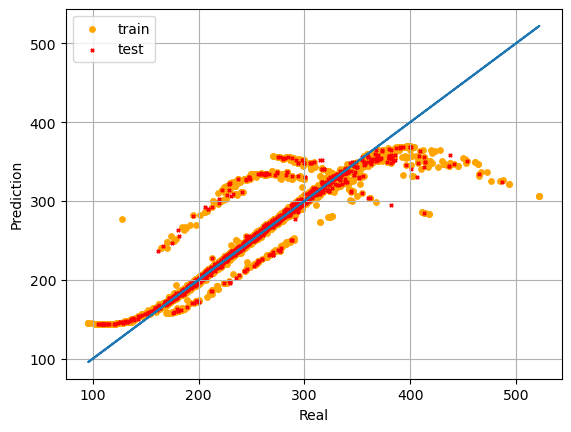

In [112]:
plt.scatter(y_train, y_pred_train , color="orange", marker = "o", s = 15, label="train")
plt.scatter(y_test, y_pred_test ,   color="red", marker = "x", s = 5, label="test")
plt.plot(data_y, data_y, "-")
# putting labels
plt.xlabel('Real')
plt.ylabel('Prediction')
# function to show plot
plt.grid()
plt.legend()
plt.show()

In [113]:


y_pred_test = lgt.predict(x_test)            # Predict
Error = MAPE(y_test, y_pred_test)          # Check Performance
Error*100

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Fuel Consumption Comb (mpg)


In [ ]:
df2 = df1.copy()
df2["Predict"] = svr.predict(data_x)
df2.to_csv("CO2_prediction_SVR.csv")